Train labels preview:
   ID  target
0   0       0
1   1       0
2   2       0
3   3       0
4   4       0

Visualizing training samples...
Sample 10 - File: 10 - Shape: (72, 48) 0


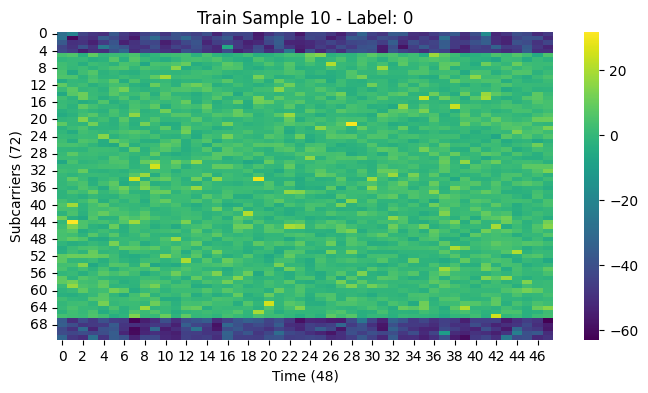

Sample 11 - File: 11 - Shape: (72, 48) 0


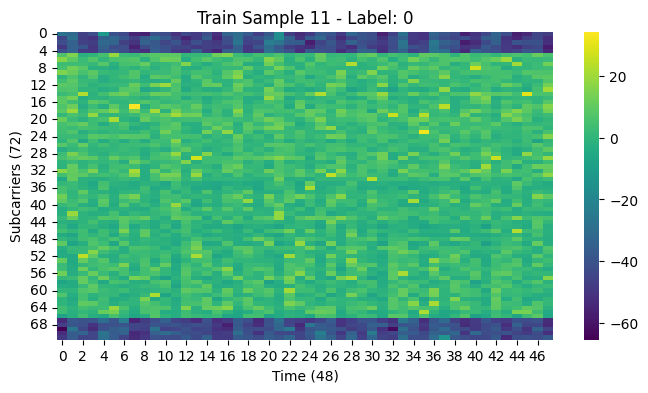

Sample 12 - File: 12 - Shape: (72, 48) 0


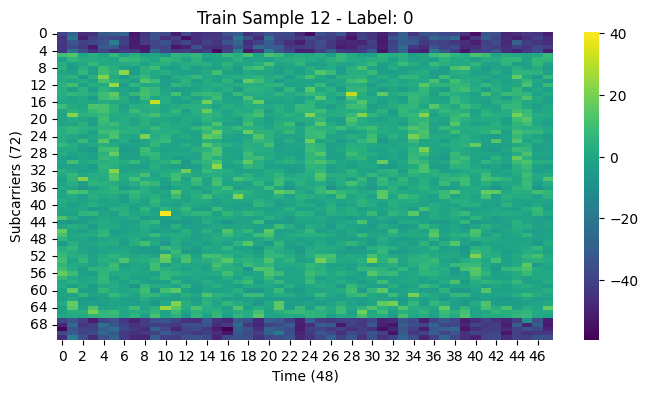


Previewing test samples (no labels)...
Test Sample 0 - File: 0.npy - Shape: (72, 48)


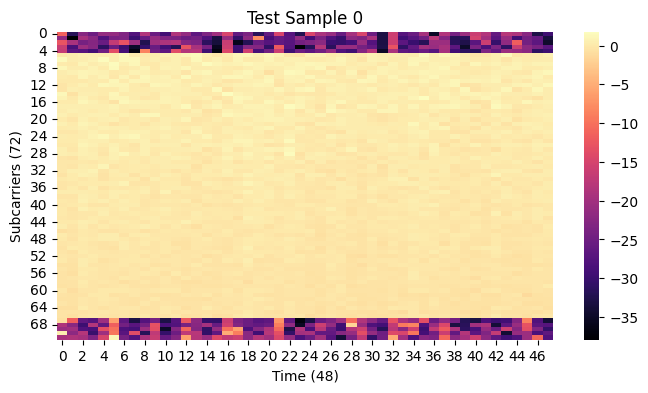

Test Sample 1 - File: 1.npy - Shape: (72, 48)


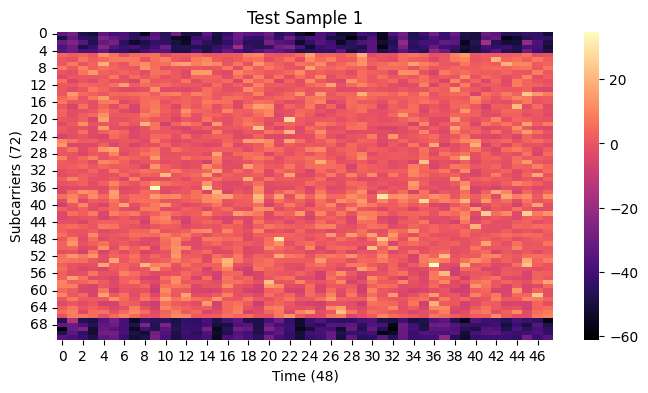

Test Sample 2 - File: 10.npy - Shape: (72, 48)


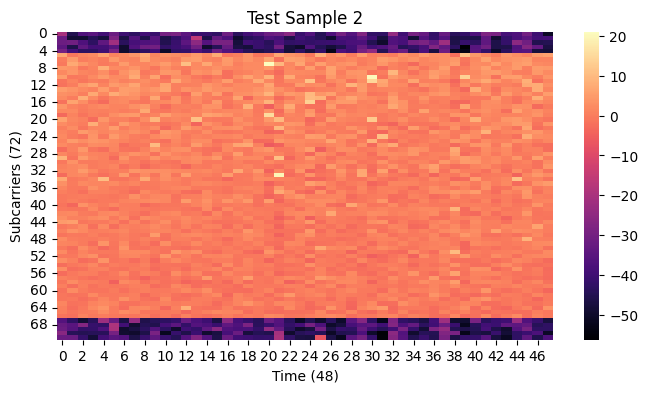

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths – Update to your own structure /content/drive/MyDrive/MLF-Project/Test
TRAIN_DIR = 'C:/Users/Martin/Documents/REPO/MPA-MLF/Project/MPA-MLF_DATA_NEW/Train/'
TEST_DIR = 'C:/Users/Martin/Documents/REPO/MPA-MLF/Project/MPA-MLF_DATA_NEW/Test/'
LABEL_PATH = 'C:/Users/Martin/Documents/REPO/MPA-MLF/Project/MPA-MLF_DATA_NEW/test_format.csv'

# Load train labels
labels_df = pd.read_csv(LABEL_PATH)
print("Train labels preview:")
print(labels_df.head())

# Visualize a few training samples
print("\nVisualizing training samples...")
train_files = sorted(os.listdir(TRAIN_DIR))
for i in range(10, 13):  # Show first 3 samples
    file_path = TRAIN_DIR + str(i) + ".npy"
    
    sample_data = np.load(file_path)
    print(f"Sample {i} - File: {i} - Shape: {sample_data.shape} {labels_df.iloc[i]['target']}")

    plt.figure(figsize=(8, 4))
    sns.heatmap(sample_data, cmap='viridis')
    plt.title(f"Train Sample {i} - Label: {labels_df.iloc[i]['target']}")
    plt.xlabel("Time (48)")
    plt.ylabel("Subcarriers (72)")
    plt.show()

# Preview some test files
print("\nPreviewing test samples (no labels)...")
test_files = sorted(os.listdir(TEST_DIR))
for i in range(3):  # Show first 3 test samples
    file_path = os.path.join(TEST_DIR, test_files[i])
    sample_data = np.load(file_path)
    print(f"Test Sample {i} - File: {test_files[i]} - Shape: {sample_data.shape}")

    plt.figure(figsize=(8, 4))
    sns.heatmap(sample_data, cmap='magma')
    plt.title(f"Test Sample {i}")
    plt.xlabel("Time (48)")
    plt.ylabel("Subcarriers (72)")
    plt.show()


In [12]:
from sklearn.model_selection import train_test_split

# --- Load and Prepare Training Data ---
X_train = []
y_train = []

for i in range(len(labels_df)):
    file_path = TRAIN_DIR + str(i) + ".npy"
    sample = np.load(file_path)
    X_train.append(sample)
    y_train.append(labels_df.iloc[i]['target'])

X_train = np.array(X_train)
y_train = np.array(y_train)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Normalize data (optional, but recommended)
X_train = X_train / np.max(X_train)

# --- Train/Validation Split ---
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

print("Training set shape:", X_tr.shape)
print("Validation set shape:", X_val.shape)

# --- Load Test Data ---
X_test = []
test_file_names = sorted(os.listdir(TEST_DIR))

for file_name in test_file_names:
    file_path = os.path.join(TEST_DIR, file_name)
    sample = np.load(file_path)
    X_test.append(sample)

X_test = np.array(X_test)
X_test = X_test / np.max(X_test)  # Apply the same normalization

print("Test data shape:", X_test.shape)


X_train shape: (120, 72, 48)
y_train shape: (120,)
Training set shape: (96, 72, 48)
Validation set shape: (24, 72, 48)
Test data shape: (120, 72, 48)
